In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
# loading ALL the data!!

data_path = '../datasets/predict_future_sales/'
df_train = pd.read_csv(data_path + 'sales_train.csv')
df_test = pd.read_csv(data_path + 'test.csv')
df_item_categories = pd.read_csv(data_path + 'item_categories-translated.xls')
df_items = pd.read_csv(data_path + 'items-translated.xls')
df_items_russian = pd.read_csv(data_path + 'items.csv')
df_shops = pd.read_csv(data_path + 'shops-translated.xls')

# Feature generation

In [3]:
# merge ALL the datasets!!

df_merged = df_train.merge(df_items)
df_merged = df_merged.merge(df_shops)
df_merged = df_merged.merge(df_items_russian).drop('item_name', axis=1)
df_merged = df_merged.merge(df_item_categories)
df_merged

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,shop_name_translated,item_category_id,item_category_name_translated
0,02.01.2013,0,59,22154,999.0,1.0,SCENE 2012 (BD),"Yaroslavl Shopping center ""Altair""",37,Cinema - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,SCENE 2012 (BD),"Moscow TC ""Budenovskiy"" (pav.K7)",37,Cinema - Blu-Ray
2,10.10.2015,33,24,22154,299.0,1.0,SCENE 2012 (BD),"Moscow TC ""Budenovskiy"" (pav.K7)",37,Cinema - Blu-Ray
3,20.01.2013,0,27,22154,999.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""MEGA Belaya Dacha II""",37,Cinema - Blu-Ray
4,12.07.2015,30,27,22154,299.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""MEGA Belaya Dacha II""",37,Cinema - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Windows payment card: 250 rubles [Digital vers...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital)
2935845,21.09.2015,32,55,13091,1000.0,1.0,Windows payment card: 1000 rubles [Digital ver...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital)
2935846,16.09.2015,32,55,13094,2500.0,1.0,Windows payment card: 2500 rubles [Digital ver...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital)
2935847,22.09.2015,32,55,13094,2500.0,2.0,Windows payment card: 2500 rubles [Digital ver...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital)


In [4]:
# get the shop location from the shop name

def get_city(shop):
    return shop.split()[0].strip()

df_merged['shop_location'] = df_merged.shop_name_translated.map(get_city)
df_merged

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,shop_name_translated,item_category_id,item_category_name_translated,shop_location
0,02.01.2013,0,59,22154,999.0,1.0,SCENE 2012 (BD),"Yaroslavl Shopping center ""Altair""",37,Cinema - Blu-Ray,Yaroslavl
1,23.01.2013,0,24,22154,999.0,1.0,SCENE 2012 (BD),"Moscow TC ""Budenovskiy"" (pav.K7)",37,Cinema - Blu-Ray,Moscow
2,10.10.2015,33,24,22154,299.0,1.0,SCENE 2012 (BD),"Moscow TC ""Budenovskiy"" (pav.K7)",37,Cinema - Blu-Ray,Moscow
3,20.01.2013,0,27,22154,999.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""MEGA Belaya Dacha II""",37,Cinema - Blu-Ray,Moscow
4,12.07.2015,30,27,22154,299.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""MEGA Belaya Dacha II""",37,Cinema - Blu-Ray,Moscow
...,...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Windows payment card: 250 rubles [Digital vers...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital),Digital
2935845,21.09.2015,32,55,13091,1000.0,1.0,Windows payment card: 1000 rubles [Digital ver...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital),Digital
2935846,16.09.2015,32,55,13094,2500.0,1.0,Windows payment card: 2500 rubles [Digital ver...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital),Digital
2935847,22.09.2015,32,55,13094,2500.0,2.0,Windows payment card: 2500 rubles [Digital ver...,Digital warehouse 1C-Online,36,Payment Cards - Windows (Digital),Digital


# EDA

**Checking for the most sold items**

In [5]:
most_sold_cat = df_merged.groupby(['item_category_name_translated'])['item_cnt_day'].sum().reset_index()
most_sold_cat = most_sold_cat.sort_values(by= 'item_cnt_day', ascending=False)
most_sold_cat.head()

,item_category_name_translated,item_cnt_day
24,Cinema - DVD,634171.0
70,PC Games - Standard Edition,456540.0
59,Music - CD of local production,348591.0
39,Games - PS3,254887.0
20,Cinema - Blu-Ray,203284.0


<AxesSubplot:xlabel='item_category_name_translated'>

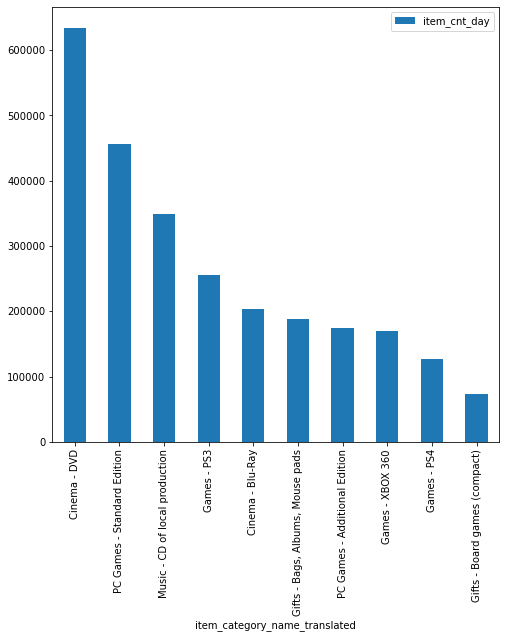

In [6]:
most_sold_cat.head(10).plot.bar(x='item_category_name_translated', figsize=(8,8))

DvD - Cinema is the category that sells the most

<AxesSubplot:title={'center':'sales of DvD during time'}, xlabel='date_block_num'>

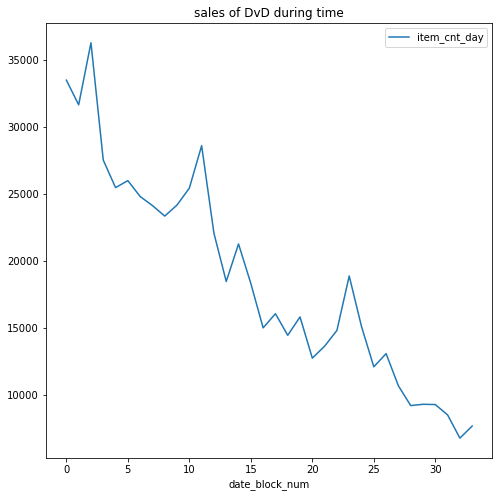

In [7]:
most_sold_cat_month = df_merged.groupby(['item_category_name_translated', 'date_block_num'])\
                        ['item_cnt_day'].sum().reset_index()
most_sold_cat_month.sort_values(by='item_cnt_day', ascending=False)
dvd_month = most_sold_cat_month.loc[most_sold_cat_month.item_category_name_translated == 'Cinema - DVD']
dvd_month = dvd_month.drop('item_category_name_translated', axis=1)
dvd_month.plot(x='date_block_num', y='item_cnt_day', figsize=(8,8), title='sales of DvD during time')

There is a negative trend in the DvD sales

In [8]:
date_category = df_merged.groupby(['date_block_num', 'item_category_name_translated'])['item_cnt_day'].sum()
date_category = pd.DataFrame(date_category)
date_category

item_cnt_day
date_block_num item_category_name_translated                    
0              Accessories - PS2                             1.0
               Accessories - PS3                          1390.0
               Accessories - PS4                           440.0
               Accessories - PSP                           251.0
               Accessories - PSVita                        623.0
...                                                          ...
33             Programs - Home and Office (Figure)         184.0
               Programs - MAC (Number)                       3.0
               Programs - Teaching                          64.0
               Programs - Teaching (Numbers)                64.0
               Tickets (figure)                             -1.0

[2077 rows x 1 columns]

Plotting every single month category sales

array([<AxesSubplot:title={'center':'(item_cnt_day, 0)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 1)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 2)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 3)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 4)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 5)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 6)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 7)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 8)'}, xlabel='item_category_name_translated'>,
       <AxesSubplot:title={'center':'(item_cnt_day, 9)'}, xlabel='item_category_name_translated'>,
       <Ax

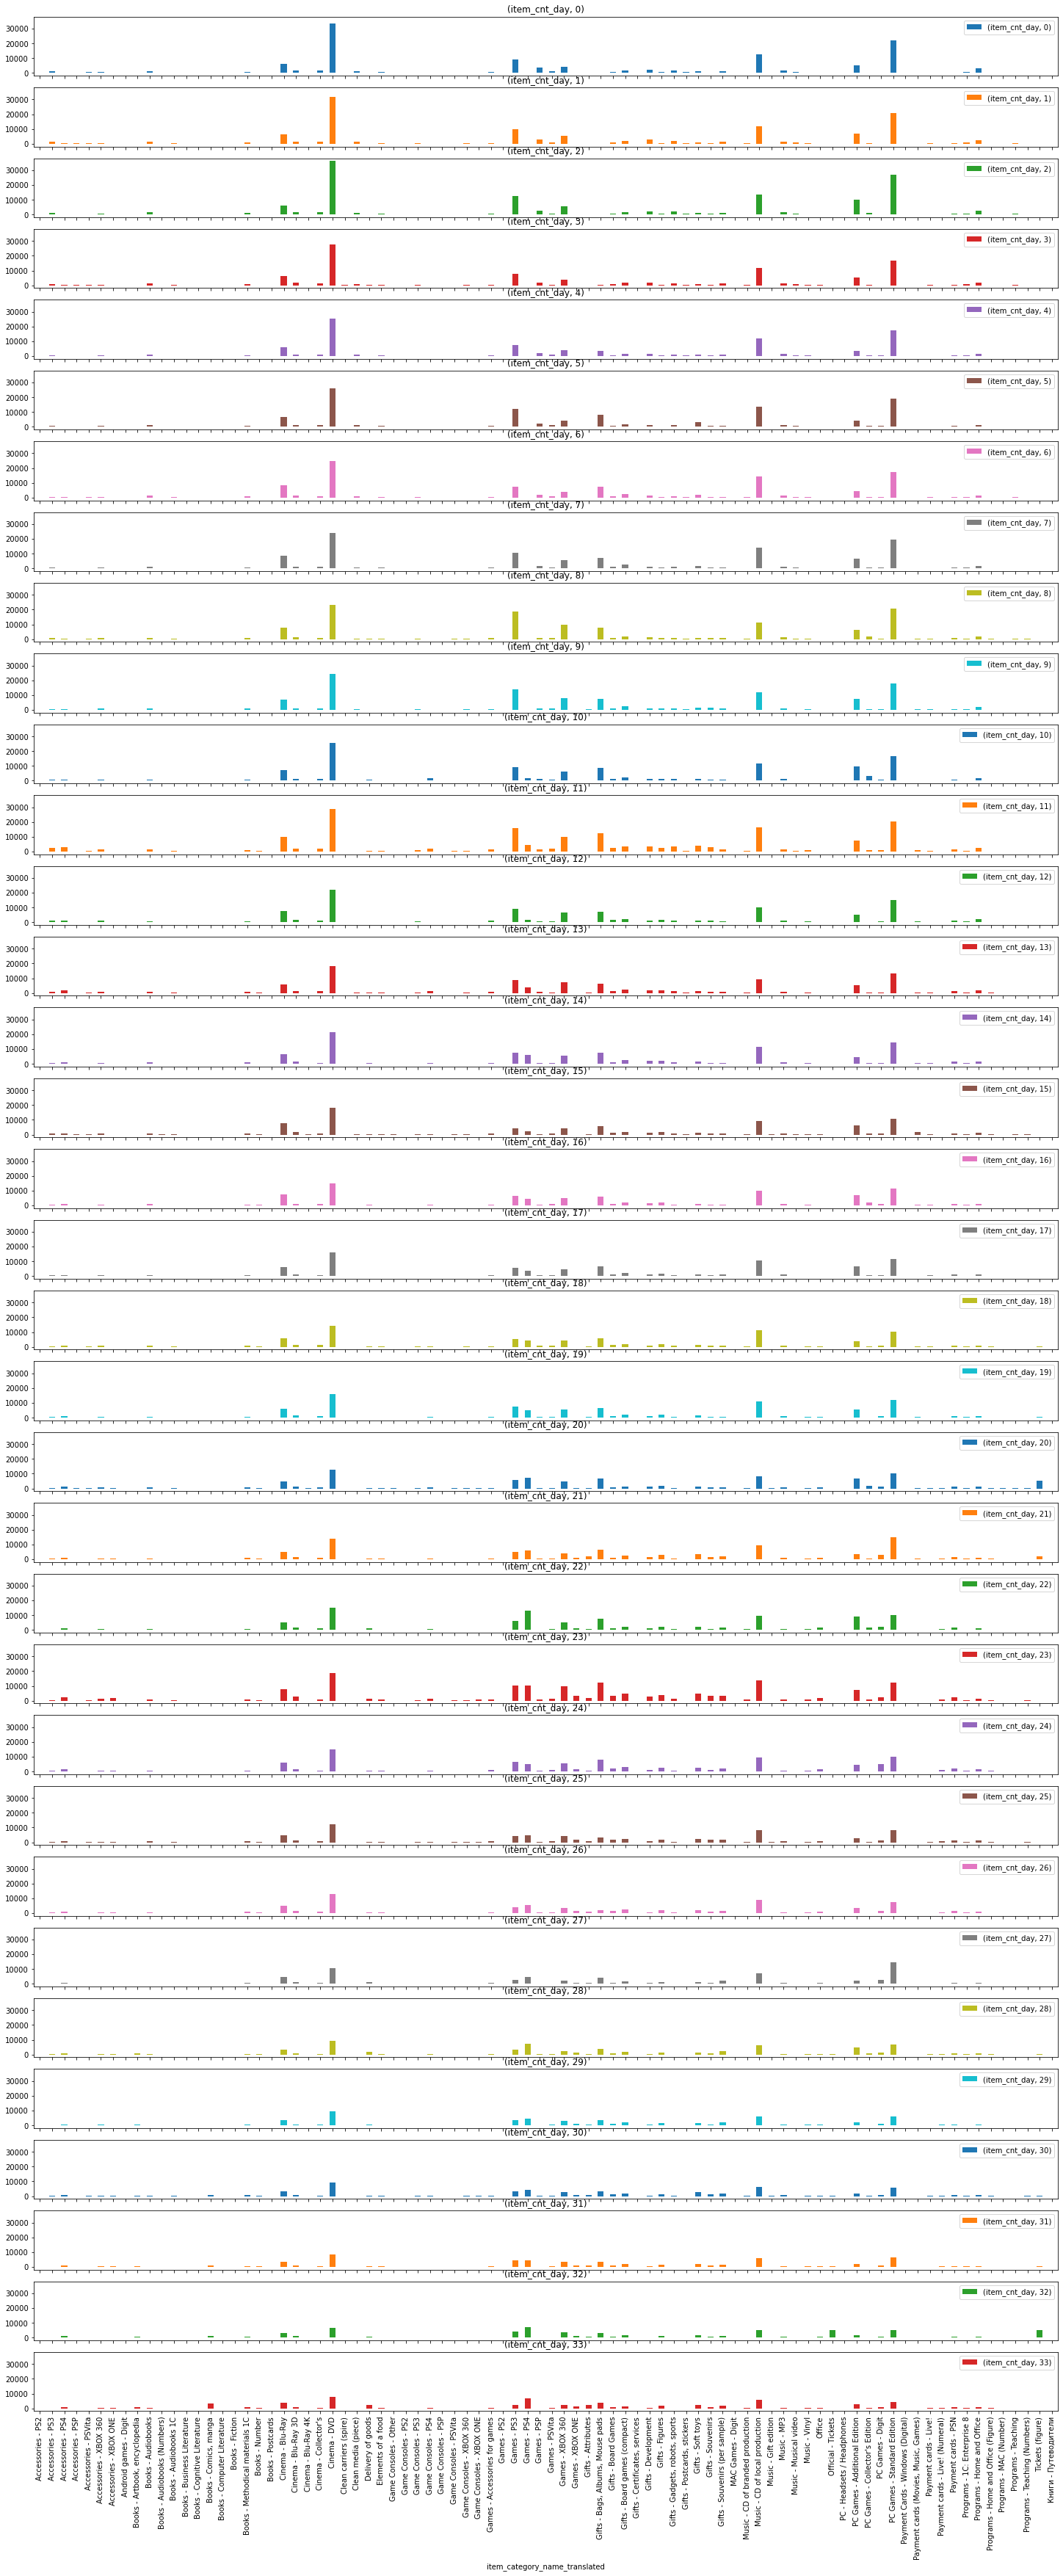

In [9]:
date_category.unstack(level=0).plot(kind='bar', subplots=True,\
                                    sharex=True, sharey=True, figsize=(25,60))

In [10]:
most_sold_item = df_merged.groupby(['item_name_translated'])['item_cnt_day'].sum().reset_index()
most_sold_item = most_sold_item.sort_values(by= 'item_cnt_day', ascending=False)
most_sold_item.head()

,item_name_translated,item_cnt_day
5327,Corporate package T-shirt 1C Interest white (3...,187642.0
6125,"Diablo III [PC, Jewel, Russian version]",17245.0
8206,"Grand Theft Auto V [PS3, Russian subtitles]",16642.0
1896,Acceptance of funds for 1C-Online,15830.0
14049,Playstation Store replenishment of wallet: Pay...,14515.0


<AxesSubplot:xlabel='item_name_translated'>

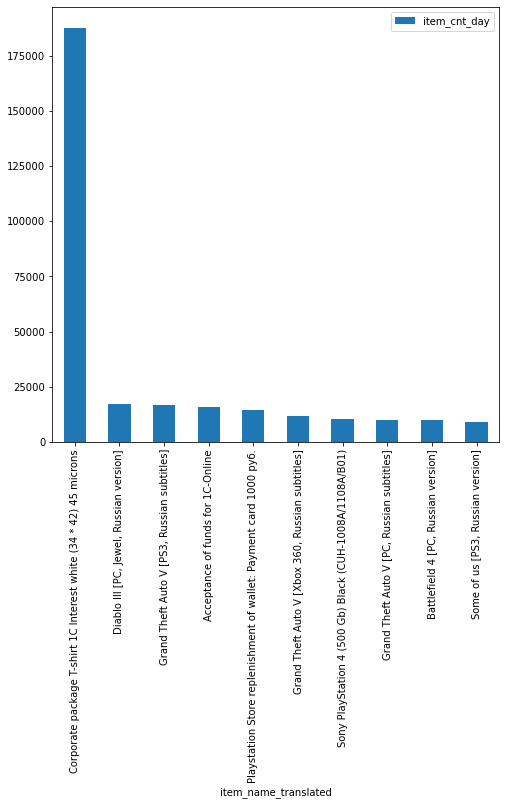

In [11]:
most_sold_item.head(10).plot.bar(x='item_name_translated', figsize=(8,8))

<AxesSubplot:title={'center':'sales of the most selled item during time'}, xlabel='date_block_num'>

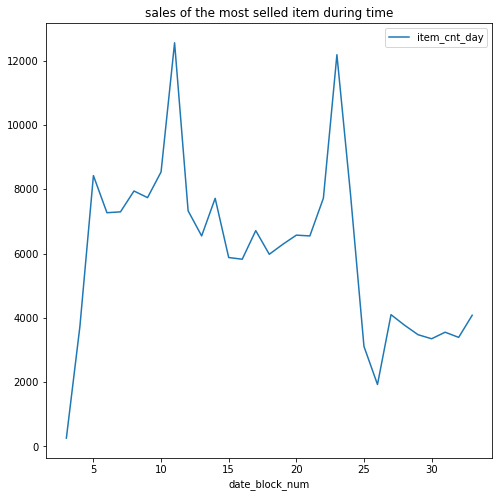

In [12]:
most_sold_item_month = df_merged.groupby(['item_name_translated', 'date_block_num'])\
                        ['item_cnt_day'].sum().reset_index()
most_sold_item_month.sort_values(by='item_cnt_day', ascending=False)
top_sell_month = most_sold_item_month.loc[most_sold_item_month.item_name_translated == 'Corporate package T-shirt 1C Interest white (34 * 42) 45 microns']
top_sell_month = top_sell_month.drop('item_name_translated', axis=1)
top_sell_month.plot(x='date_block_num', y='item_cnt_day', figsize=(8,8), title='sales of the most selled item during time')

**Checking locations**

In [13]:
# location with the highest number of sales

loc_sales = df_merged.groupby(['shop_location'])['item_cnt_day'].sum().reset_index()
loc_sales = loc_sales.sort_values(by='item_cnt_day', ascending=False)
loc_sales.head()

,shop_location,item_cnt_day
10,Moscow,1276376.0
30,Yakutsk,240857.0
20,SPb,195542.0
7,Khimki,185790.0
29,Voronezh,171142.0


<AxesSubplot:xlabel='shop_location'>

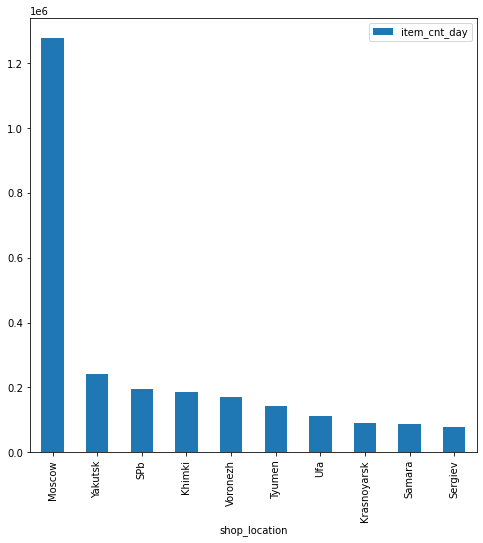

In [14]:
loc_sales.head(10).plot.bar(x='shop_location', figsize=(8,8))

In [15]:
# shops with the highest number of sales

shop_sale = df_merged.groupby(['shop_name_translated'])['item_cnt_day'].sum().reset_index()
shop_sale = shop_sale.sort_values(by='item_cnt_day', ascending=False)
shop_sale.head()

,shop_name_translated,item_cnt_day
24,"Moscow ТЦ ""Семеновский""",310777.0
20,"Moscow TRK ""Atrium""",241920.0
8,"Khimki ТЦ ""Mega""",185790.0
23,"Moscow ТЦ ""MEGA Teply Stan"" II",184557.0
36,"SPb TC ""Nevsky Center""",144934.0


<AxesSubplot:xlabel='shop_name_translated'>

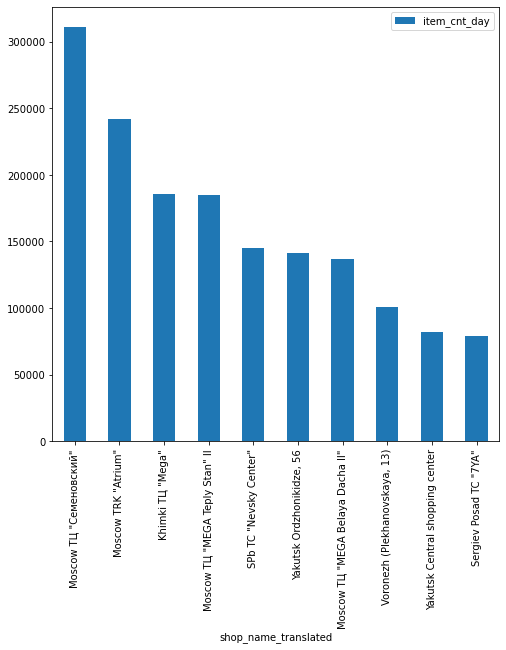

In [16]:
shop_sale.head(10).plot.bar(x='shop_name_translated', figsize=(8,8))

Exploring the best shop

In [23]:
best_shop = df_merged.loc[df_merged['shop_name_translated'] == 'Moscow ТЦ "Семеновский"']
best_shop.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,shop_name_translated,item_category_id,item_category_name_translated,shop_location
17,05.01.2013,0,31,22154,999.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""Семеновский""",37,Cinema - Blu-Ray,Moscow
18,11.10.2013,9,31,22154,999.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""Семеновский""",37,Cinema - Blu-Ray,Moscow
19,31.12.2013,11,31,22154,999.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""Семеновский""",37,Cinema - Blu-Ray,Moscow
20,14.07.2015,30,31,22154,299.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""Семеновский""",37,Cinema - Blu-Ray,Moscow
21,03.08.2015,31,31,22154,299.0,1.0,SCENE 2012 (BD),"Moscow ТЦ ""Семеновский""",37,Cinema - Blu-Ray,Moscow


<AxesSubplot:xlabel='date_block_num'>

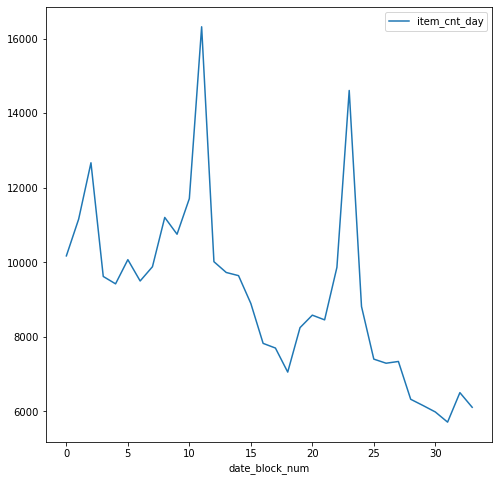

In [30]:
best_shop_date = best_shop.groupby(['date_block_num'])['item_cnt_day'].sum().reset_index()
best_shop_date.plot(x='date_block_num', y='item_cnt_day', figsize=(8,8))

We can see that the trend is going down, but we have two high peak. Let's investigate them

In [49]:
best_shop_date.sort_values(by='item_cnt_day', ascending=False)
best_month = best_shop.loc[(best_shop.date_block_num == 11) | (best_shop.date_block_num == 23)]
best_month.sort_values(by='item_cnt_day', ascending=False).head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,shop_name_translated,item_category_id,item_category_name_translated,shop_location
2742891,30.12.2014,23,31,20949,5.0,107.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742890,31.12.2014,23,31,20949,5.0,86.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742534,29.12.2013,11,31,20949,5.0,81.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742532,27.12.2013,11,31,20949,5.0,80.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742894,27.12.2014,23,31,20949,5.0,80.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742535,30.12.2013,11,31,20949,5.0,75.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742536,31.12.2013,11,31,20949,5.0,74.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742533,28.12.2013,11,31,20949,5.0,73.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742892,29.12.2014,23,31,20949,5.0,65.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow
2742895,26.12.2014,23,31,20949,5.0,64.0,Corporate package T-shirt 1C Interest white (3...,"Moscow ТЦ ""Семеновский""",71,"Gifts - Bags, Albums, Mouse pads",Moscow


In [46]:
best_month.groupby(['item_name_translated', 'item_category_name_translated'])\
['item_cnt_day'].sum().reset_index().sort_values(by='item_cnt_day', ascending=False)

,item_name_translated,item_category_name_translated,item_cnt_day
1295,Corporate package T-shirt 1C Interest white (3...,"Gifts - Bags, Albums, Mouse pads",2514.0
734,"Battlefield 4 [PC, Russian version]",PC Games - Standard Edition,141.0
374,Acceptance of funds for 1C-Online,Office,131.0
3831,Playstation Store replenishment of wallet: Pay...,Payment cards - PSN,124.0
5596,World of Warcraft. Game time payment card (onl...,PC Games - Additional Edition,120.0
...,...,...,...
4856,T-shirt Diablo III Special Edition black S,Gifts - Attributes,0.0
3817,Planet mp3. Instrumental Collection (mp3-CD) ...,Music - MP3,0.0
4192,SLAYER Still Reigning DVD,Music - Musical video,0.0
2226,HUNTING SEASON (BD),Cinema - Blu-Ray,0.0


**Numerical value distributions**

Text(0.5, 1.0, 'item_cnt_day')

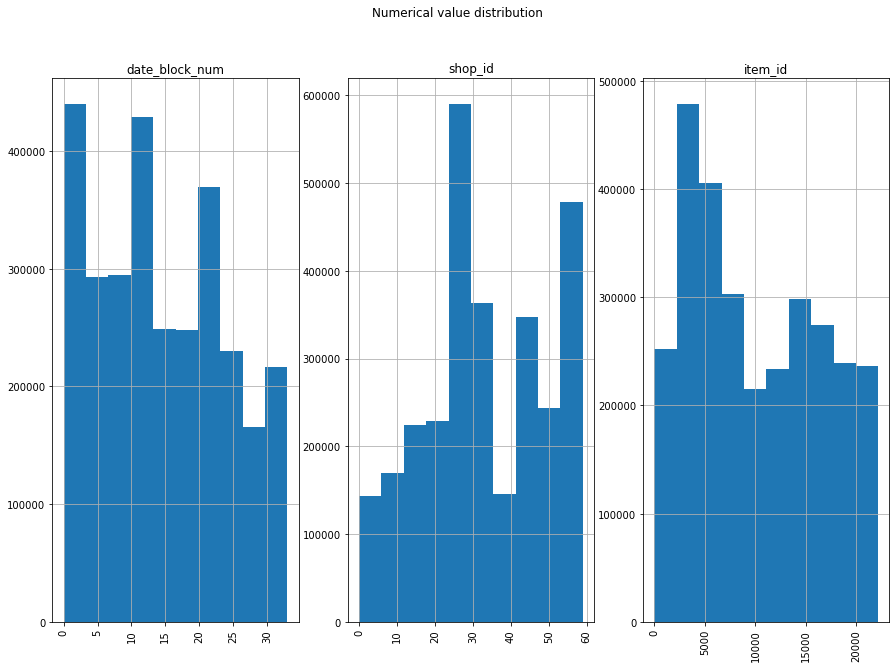

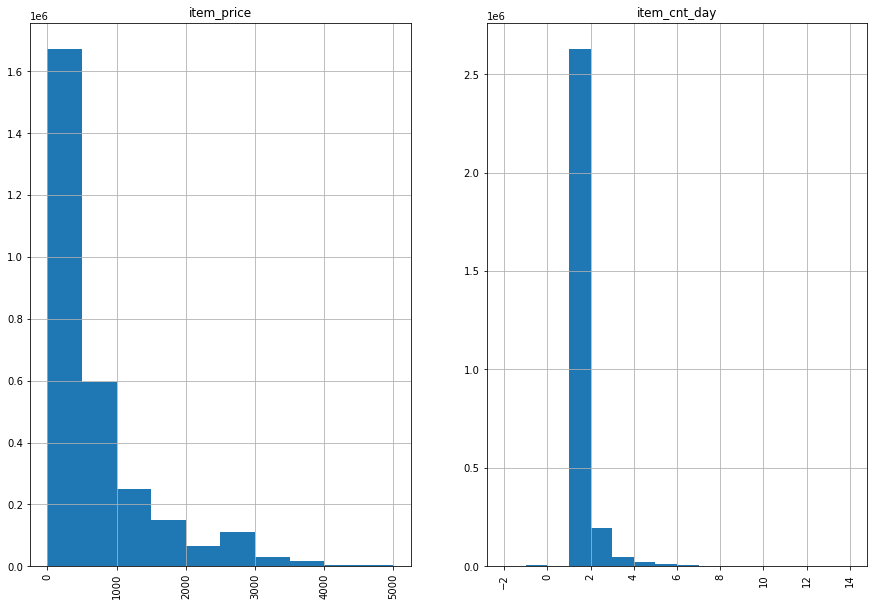

In [18]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,10))
df_train.date_block_num.hist(ax=axes[0], xrot=90)
df_train.shop_id.hist(ax=axes[1], xrot=90)
df_train.item_id.hist(ax=axes[2], xrot=90)
axes[0].set_title('date_block_num')
axes[1].set_title('shop_id')
axes[2].set_title('item_id')
fig.suptitle('Numerical value distribution')
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
df_train.item_price.hist(bins=[0, 500, 1000, 1500, 2000, 2500,3000, 3500, 4000, 4500, 5000],
                   ax=axes[0], xrot=90)
df_train.item_cnt_day.hist(bins= np.arange(-2, 15), ax=axes[1], xrot=90)
axes[0].set_title('item_price')
axes[1].set_title('item_cnt_day')

**Boxplots to check for outliers**

/home/lpianta/anaconda3/envs/machine_learning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/lpianta/anaconda3/envs/machine_learning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/lpianta/anaconda3/envs/machine_learning/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword wil

Text(0.5, 1.0, 'item_cnt_day')

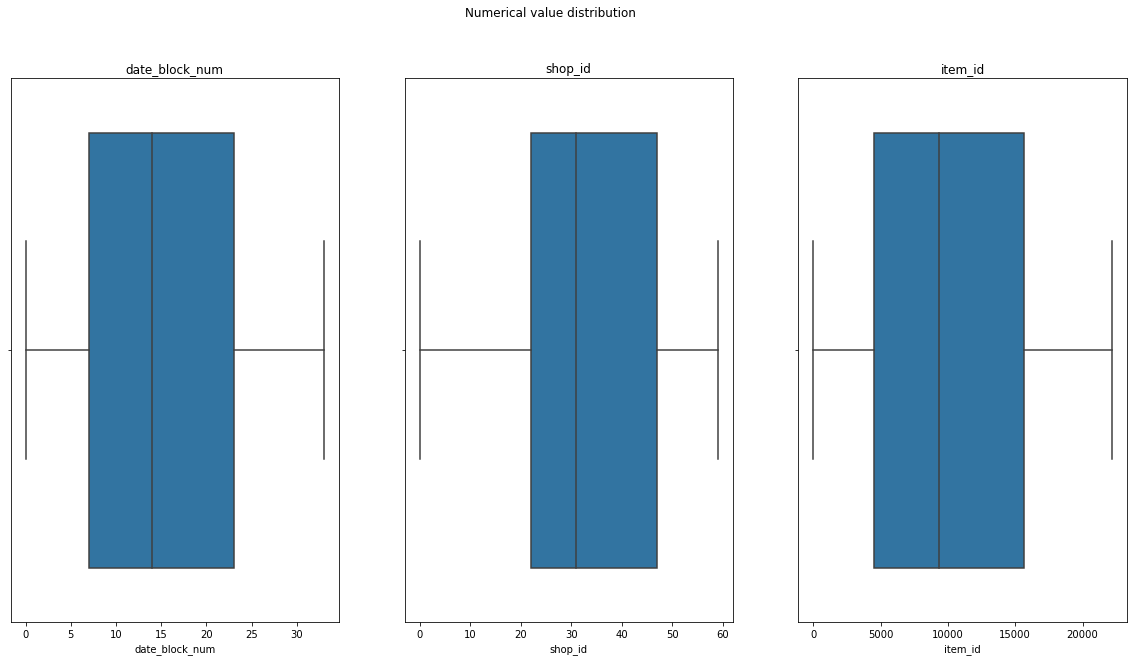

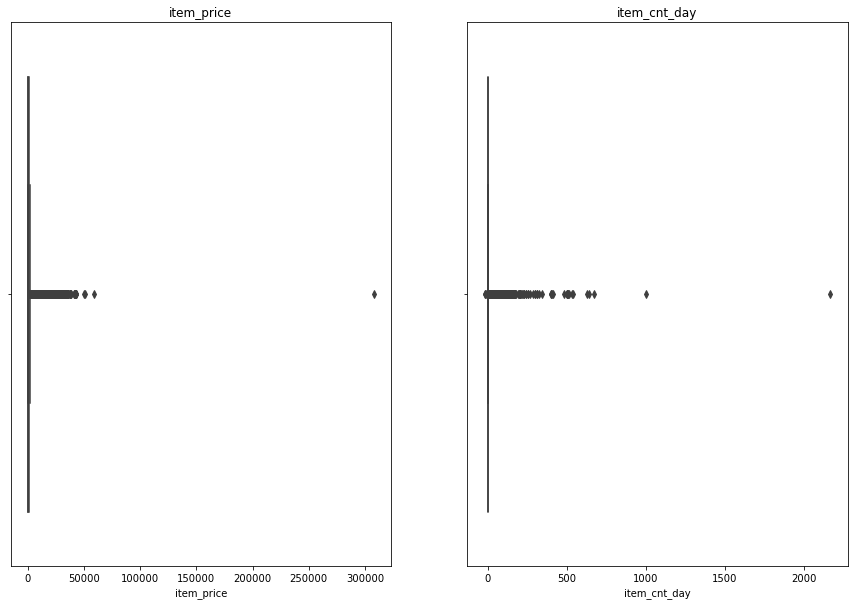

In [19]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
sns.boxplot(df_train.date_block_num, ax=axes[0])
sns.boxplot(df_train.shop_id,ax=axes[1])
sns.boxplot(df_train.item_id, ax=axes[2])
axes[0].set_title('date_block_num')
axes[1].set_title('shop_id')
axes[2].set_title('item_id')
fig.suptitle('Numerical value distribution')
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
sns.boxplot(df_train.item_price, ax=axes[0])
sns.boxplot(df_train.item_cnt_day, ax=axes[1])
axes[0].set_title('item_price')
axes[1].set_title('item_cnt_day')

There are some outliers in "item_price" and "item_cnt_day"

In [20]:
# outlier in the item_price column

max_price = df_merged.item_price.max()
df_merged.loc[df_merged.item_price == max_price]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,shop_name_translated,item_category_id,item_category_name_translated,shop_location
2007715,13.12.2013,11,12,6066,307980.0,1.0,Radmin 3 - 522 people.,Online shop Emergency,75,Programs - Home and Office,Online


In [21]:
# outliers in the item_cnt_day column

df_merged.loc[df_merged.item_cnt_day > 800]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name_translated,shop_name_translated,item_category_id,item_category_name_translated,shop_location
2760554,15.01.2015,24,12,20949,4.000000,1000.0,Corporate package T-shirt 1C Interest white (3...,Online shop Emergency,71,"Gifts - Bags, Albums, Mouse pads",Online
2900510,28.10.2015,33,12,11373,0.908714,2169.0,Delivery to the point of issue (Boxberry),Online shop Emergency,9,Delivery of goods,Online
